# Imports

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error

# Modeling

In [115]:
df = pd.read_csv('AEP_hourly.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')

In [116]:
df = df.set_index('Datetime')

In [117]:
df.head(5)

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0


In [118]:
# train = df[df['Datetime'] < '01-01-2015']
train = df.loc[df.index < '01-01-2015'].copy()

# test = df[df['Datetime'] >= '01-01-2015']
test = df.loc[df.index >= '01-01-2015'].copy()

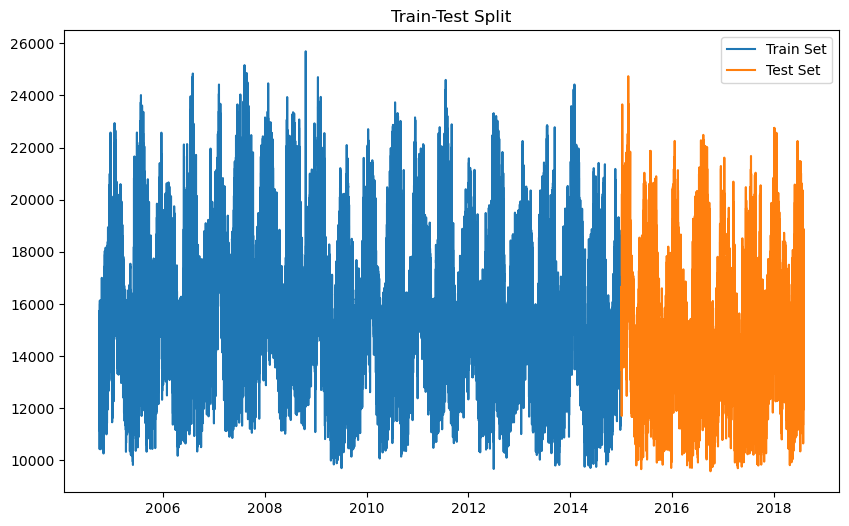

In [119]:
# Visualize the split (optional)
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train Set')
plt.plot(test, label='Test Set')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [120]:
# checking for non-stationarity
ts = train['AEP_MW']

result = adfuller(ts.dropna())
print(f"ADF Statistic: {result[0]:.2f}")
print(f"p-value: {result[1]:.2f}")

ADF Statistic: -14.57
p-value: 0.00


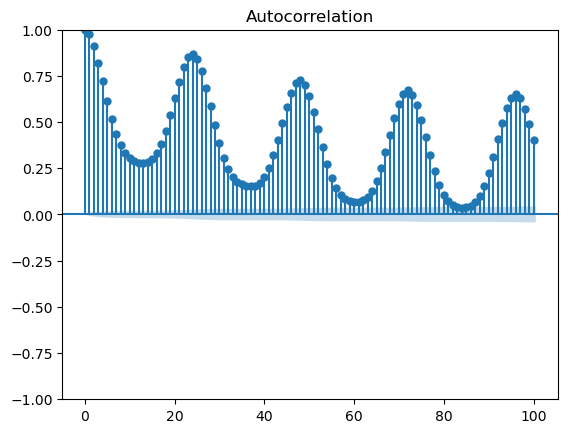

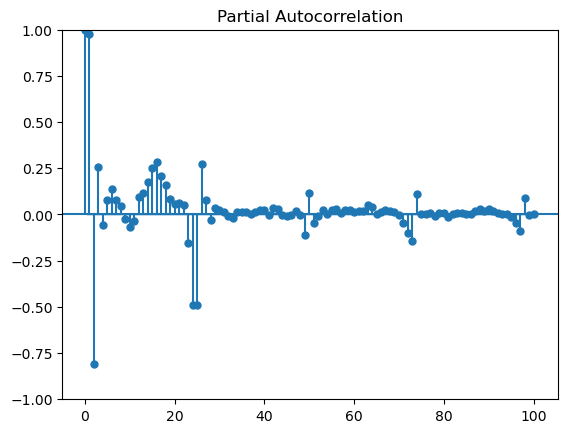

In [121]:
plot_acf(ts, lags = 100)
plt.show()

plot_pacf(ts, lags = 100)
plt.show()

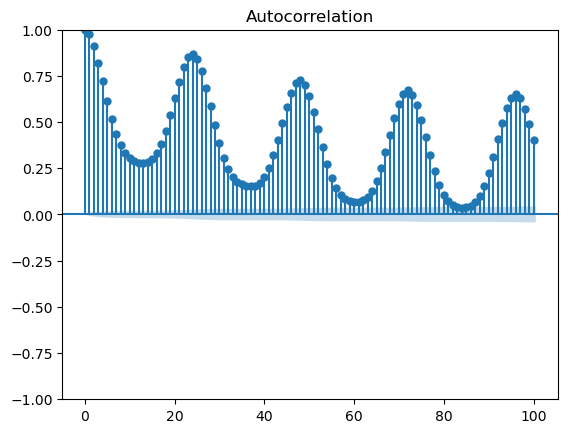

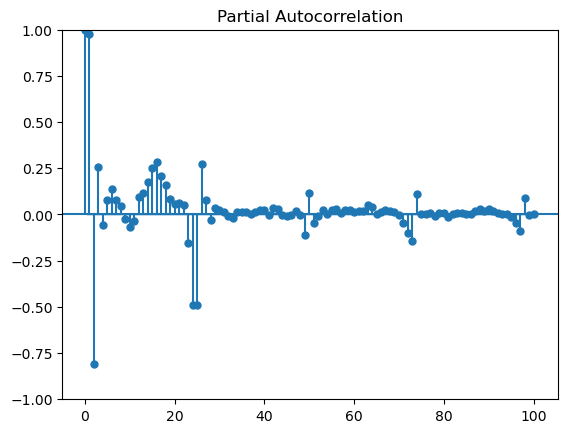

In [122]:
plot_acf(ts, lags = 100, fft=True)
plt.show()

plot_pacf(ts, lags = 100, method='ywm')
plt.show()

In [123]:
# Fit the SARIMA model
model = SARIMAX(ts, 
                order=(1, 1, 1),     # (p, d, q)
                seasonal_order=(1, 1, 1, 24),  # (P, D, Q, m)
                enforce_stationarity=False, 
                enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the summary of the fitted model
print(results.summary())

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MemoryError: Unable to allocate 1.74 GiB for an array with shape (51, 51, 89833) and data type float64

In [ ]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, dynamic = False)

In [ ]:
predictions

In [ ]:
last_train_date = train.index[-1]

predictions_index = pd.date_range(start = last_train_date + pd.Timedelta(hours=1), periods=len(test), freq='h')

predictions_df = pd.DataFrame(predictions, index=predictions_index, columns = ['forecast'])

In [ ]:
predictions_df

In [ ]:
# Plot the predictions along with the actual test set values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train Set')
plt.plot(test, label='Test Set')
plt.plot(predictions_df, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()